# **Implementing Linear Regression From Scratch**

---

This chapter focuses on implementing Linear Regression step by step, without relying on pre-built libraries, to gain a deep understanding of its mechanics.

---

### **Step 1: Generating Synthetic Data**

To test our implementation, we'll create a synthetic dataset that follows a linear pattern with added noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

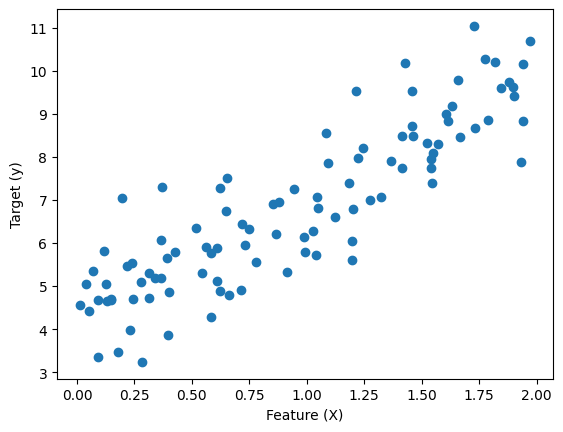

In [3]:
# Visualize the dataset
plt.scatter(X, y)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.show()

### **Step 2: Adding the Bias Term**

Linear Regression requires a bias term (\(\theta_0\)). We'll add a column of ones to the feature matrix.

In [4]:
# Add bias term (x0 = 1) to feature matrix
X_b = np.c_[np.ones((100, 1)), X]

---

### **Step 3: Implementing the Normal Equation**

We can compute the optimal parameters (\(\theta\)) using the Normal Equation:

$
\theta = \left( X^T X \right)^{-1} X^T y
$

In [5]:
# Compute optimal parameters using the Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
print("Optimal Parameters (Normal Equation):", theta_best)

Optimal Parameters (Normal Equation): [[4.21509616]
 [2.77011339]]


---

### **Step 4: Making Predictions**

Using the computed parameters, we can predict values for new data points.

In [7]:
# New data points for prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [8]:
# Predict target values
y_predict = X_new_b.dot(theta_best)

In [9]:
print("Predictions:", y_predict)

Predictions: [[4.21509616]
 [9.75532293]]


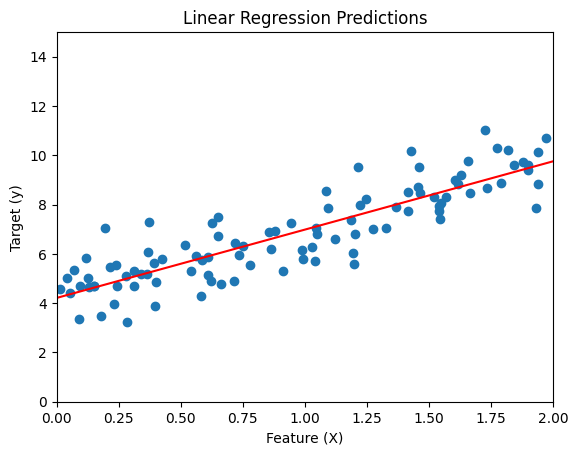

In [10]:
# Visualize predictions
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.title("Linear Regression Predictions")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.axis([0, 2, 0, 15])
plt.show()

---

### **Step 5: Gradient Descent Implementation**

For larger datasets, Gradient Descent is more efficient. Let’s implement it step by step.

#### **Algorithm**
1. Initialize parameters (\(\theta\)) randomly.
2. Compute the gradient of the cost function.
3. Update parameters iteratively using:

$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} MSE(\theta)
$

Where:
- $(\alpha)$: Learning rate.

#### **Code Implementation**

In [11]:
# Gradient Descent implementation
learning_rate = 0.1
n_iterations = 1000
m = len(X_b)

In [12]:
# Initialize parameters
theta = np.random.randn(2, 1)  # Random initialization

In [13]:
# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients

In [14]:
print("Optimal Parameters (Gradient Descent):", theta)

Optimal Parameters (Gradient Descent): [[4.21509616]
 [2.77011339]]


### **Step 6: Predictions with Gradient Descent**

Using the parameters learned via Gradient Descent, make predictions.

In [15]:
# Predict target values
y_pred_gd = X_new_b.dot(theta)

In [16]:
print("Predictions (Gradient Descent):", y_pred_gd)

Predictions (Gradient Descent): [[4.21509616]
 [9.75532293]]


---

### **Step 7: Evaluating the Model**

Evaluate the model using **Mean Squared Error (MSE)** and **R-squared (R²)** metrics.

#### **MSE Calculation**

$
MSE = \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Compute MSE
mse = mean_squared_error(y, X_b.dot(theta))
print("Mean Squared Error:", mse)

Mean Squared Error: 0.806584563967053


#### **R-squared Calculation**

$
R^2 = 1 - \frac{\text{SS}_{\text{residual}}}{\text{SS}_{\text{total}}}
$

In [19]:
from sklearn.metrics import r2_score

# Compute R²
r2 = r2_score(y, X_b.dot(theta))
print("R-squared:", r2)

R-squared: 0.7692735413614225


---

### **Step 8: Comparing Normal Equation and Gradient Descent**

Both methods should yield similar results:

- **Normal Equation**: Directly computes the optimal parameters.
- **Gradient Descent**: Iteratively converges to the optimal parameters.


In [20]:
print("Parameters (Normal Equation):", theta_best)
print("Parameters (Gradient Descent):", theta)

Parameters (Normal Equation): [[4.21509616]
 [2.77011339]]
Parameters (Gradient Descent): [[4.21509616]
 [2.77011339]]


---

### **Key Takeaways**
1. **Normal Equation**:
   - Efficient for small datasets with low-dimensional features.
   - Computationally expensive for high-dimensional data $((O(n^3)))$.

2. **Gradient Descent**:
   - Scalable for large datasets.
   - Requires careful tuning of the learning rate.

3. Both methods yield comparable results but are suited for different scenarios.

---
---